# What this file does

Gathers Fall FTE (full time equivalent numbers) for CT's 12 Community Colleges from 2000-2018. 

# Getting the data 

Sources: https://nces.ed.gov/ipeds/datacenter/InstitutionByName.aspx?stepId=1 and https://www.ct.edu/. There are 12 2-year community colleges in CT, and 4 state colleges + Charter Oak which is wholly online. 

This federal data runs from 2000-2018. 2018 is supposed to be a provisional release, but you shouldn't expect there to be too many changes to that data according to the head of the IPEDs data center. I'm looking at the Full-Time Total numbers from their Fall Enrollment Surveys. If needed, I can refine this analysis by race/gender.

# Tools

In [1]:
import pandas as pd

# Data cleaning + analysis

In [ ]:
#read in the data

In [2]:
df = pd.read_csv('community_colleges.csv')

In [ ]:
#check that you have all 12 colleges

In [3]:
df

,UnitID,Institution Name,Full time total (EF2018 All students total),Full time total (EF2017_RV All students total),Full time total (EF2016_RV All students total),Full time total (EF2015_RV All students total),Full time total (EF2014_RV All students total),Full time total (EF2013_RV All students total),Full time total (EF2012_RV All students total),Full time total (EF2011_RV All students total),...,Full time total (EF2008_RV All students total),Full time total (EF2007_RV All students total),Full time total (EF2006_RV All students total),Full time total (EF2005_RV All students total),Full time total (EF2004_RV All students total),Full time total (EF2003 All students total),Full time total (EF2002 All students total),Full time total (EF2001 All students total),Full time total (EF2000 All students total),Unnamed: 21
0,128577,Asnuntuck Community College,621,676,652,622,690,703,650,650,...,642,617,568,526,492,456,434,409,390,NaN
1,129367,Capital Community College,654,690,688,825,971,993,1052,1179,...,1078,1027,896,927,896,848,793,640,571,NaN
2,130396,Gateway Community College,2069,2179,2081,2286,2589,2689,2612,2490,...,2351,2187,1961,1809,1706,1526,1522,1228,1060,NaN
3,129543,Housatonic Community College,1684,1729,1767,1654,1694,1843,2056,2242,...,1878,1616,1489,1477,1510,1372,1215,1068,861,NaN
4,129695,Manchester Community College,2004,1969,2169,2383,2517,2712,2721,2819,...,3227,2940,2678,2713,2512,2238,2117,1872,1714,NaN
5,129756,Middlesex Community College,885,996,976,1087,1162,1089,1088,1099,...,1017,1037,943,876,867,752,704,614,581,NaN
6,129729,Naugatuck Valley Community College,2181,2173,2231,2362,2370,2603,2647,2764,...,2564,2490,2266,2211,2139,1936,1904,1774,1681,NaN
7,130040,Northwestern Connecticut Community College,379,375,419,434,423,457,464,511,...,570,548,521,527,513,510,478,402,398,NaN
8,130004,Norwalk Community College,1737,2054,1978,2134,2258,2180,2267,2375,...,2389,2197,2102,2015,1986,1947,1802,1663,1456,NaN
9,130217,Quinebaug Valley Community College,477,505,524,587,671,677,691,663,...,715,661,669,643,571,510,487,467,392,NaN


In [ ]:
#wide to long

In [4]:
new_df = df.melt(id_vars=['Institution Name', 'UnitID'])

In [5]:
new_df

,Institution Name,UnitID,variable,value
0,Asnuntuck Community College,128577,Full time total (EF2018 All students total),621.0
1,Capital Community College,129367,Full time total (EF2018 All students total),654.0
2,Gateway Community College,130396,Full time total (EF2018 All students total),2069.0
3,Housatonic Community College,129543,Full time total (EF2018 All students total),1684.0
4,Manchester Community College,129695,Full time total (EF2018 All students total),2004.0
...,...,...,...,...
235,Northwestern Connecticut Community College,130040,Unnamed: 21,NaN
236,Norwalk Community College,130004,Unnamed: 21,NaN
237,Quinebaug Valley Community College,130217,Unnamed: 21,NaN
238,Three Rivers Community College,129808,Unnamed: 21,NaN


In [ ]:
#create year column

In [6]:
new_df['Year'] = new_df.variable.str.extract(r'.*EF(\d\d\d\d)').astype(float)

In [22]:
new_df

,Institution Name,UnitID,variable,value,Year
0,Asnuntuck Community College,128577,Full time total (EF2018 All students total),621.0,2018.0
1,Capital Community College,129367,Full time total (EF2018 All students total),654.0,2018.0
2,Gateway Community College,130396,Full time total (EF2018 All students total),2069.0,2018.0
3,Housatonic Community College,129543,Full time total (EF2018 All students total),1684.0,2018.0
4,Manchester Community College,129695,Full time total (EF2018 All students total),2004.0,2018.0
...,...,...,...,...,...
235,Northwestern Connecticut Community College,130040,Unnamed: 21,NaN,NaN
236,Norwalk Community College,130004,Unnamed: 21,NaN,NaN
237,Quinebaug Valley Community College,130217,Unnamed: 21,NaN,NaN
238,Three Rivers Community College,129808,Unnamed: 21,NaN,NaN


In [ ]:
#2000-2018

In [44]:
new_df['Year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000.,   nan])

# Final form for viz

In [ ]:
#sum across years, convert series to dataframe, rename columns

In [45]:
df_final = pd.DataFrame(new_df.groupby(by='Year').value.sum()).rename(columns={
    'Year':'year',
    'value':'FTE'
}).reset_index()

In [46]:
df_final

,Year,FTE
0,2000.0,10885.0
1,2001.0,12044.0
2,2002.0,13715.0
3,2003.0,14469.0
4,2004.0,15798.0
5,2005.0,16385.0
6,2006.0,16827.0
7,2007.0,18179.0
8,2008.0,19694.0
9,2009.0,21404.0


# Fall FTE numbers across all 12 colleges

<AxesSubplot:xlabel='Year'>

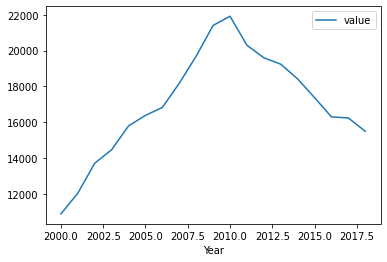

In [28]:
pd.DataFrame(new_df.groupby(by='Year').value.sum()).plot()

# % change in FTE across all 12 colleges

In [ ]:
#calculate % change

In [48]:
df_final['pct_change'] = df_final.FTE.pct_change()

In [51]:
df_final['pct_change'] = df_final['pct_change']*100

In [53]:
df_final

,Year,FTE,pct_change
0,2000.0,10885.0,NaN
1,2001.0,12044.0,10.647680
2,2002.0,13715.0,13.874128
3,2003.0,14469.0,5.497630
4,2004.0,15798.0,9.185154
5,2005.0,16385.0,3.715660
6,2006.0,16827.0,2.697589
7,2007.0,18179.0,8.034706
8,2008.0,19694.0,8.333792
9,2009.0,21404.0,8.682848


<AxesSubplot:xlabel='Year'>

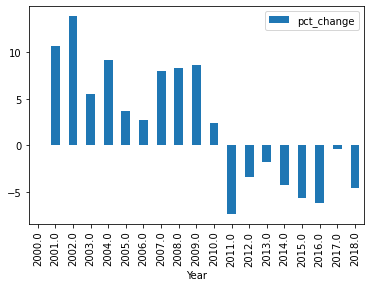

In [52]:
df_final.plot(x='Year', y='pct_change', kind='bar')